# Cereal Dataset Analysis

## Phase 1: Business Understanding

### Objective
The goal of this analysis is to understand the nutritional content and rating of different cereals to help consumers make informed decisions. We will explore the data to uncover patterns and relationships among various features of the cereals.

### Business Questions
1. What are the nutritional attributes of cereals from different manufacturers?
2. How do nutritional attributes like calories, sugars, and fat affect the rating of cereals?
3. Are there significant differences in cereal ratings based on the manufacturer?

## Phase 2: Data Understanding

### Initial Data Exploration
Let's load the dataset and perform an initial exploration to understand its structure and content.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats

In [2]:
file_path = 'Data/cereal.csv'
cereal_data = pd.read_csv(file_path)

In [3]:
cereal_data

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [4]:
cereal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [5]:
cereal_data.shape

(77, 16)

### Checking for Missing Values and Anomalies
We need to check for missing values and any anomalies in the dataset.


In [6]:
# Check for missing values
cereal_data.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [7]:
summary_statistics = cereal_data.describe(include='all')
summary_statistics

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77,77,77,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
unique,77,7,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,100% Bran,K,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,23,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,NaN,NaN,NaN,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,NaN,NaN,NaN,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,NaN,NaN,NaN,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,NaN,NaN,NaN,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,NaN,NaN,NaN,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392


### Handling Anomalies
The `carbo`, `sugars`, and `potass` columns have negative values which are likely erroneous. We will replace these negative values with their respective median values.


In [8]:
# Replace negative values in carbo
median_carbo = cereal_data['carbo'].median()
cereal_data.loc[cereal_data['carbo'] < 0, 'carbo'] = median_carbo

# Replace negative values in sugars
median_sugars = cereal_data['sugars'].median()
cereal_data.loc[cereal_data['sugars'] < 0, 'sugars'] = median_sugars

# Replace negative values in potass
median_potass = cereal_data['potass'].median()
cereal_data.loc[cereal_data['potass'] < 0, 'potass'] = median_potass

# Verify the changes
cleaned_summary_statistics = cereal_data.describe(include='all')
cleaned_summary_statistics


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77,77,77,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
unique,77,7,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,100% Bran,K,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,23,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,106.883117,2.545455,1.012987,159.675325,2.151948,14.792208,7.025974,98.441558,28.246753,2.207792,1.029610,0.821039,42.665705
std,NaN,NaN,NaN,19.484119,1.094790,1.006473,83.832295,2.383364,3.882612,4.349755,69.491857,22.342523,0.832524,0.150477,0.232716,14.047289
min,NaN,NaN,NaN,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,NaN,NaN,NaN,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,45.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,NaN,NaN,NaN,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,NaN,NaN,NaN,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392


# Phase 3: Data Preparation

## Feature Selection
We'll select relevant features for the analysis and create any necessary derived attributes.


In [9]:
# List of relevant features for the analysis
numerical_cols = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'weight', 'cups', 'rating']

### Rename mfr

In [10]:
mfg = {'A':'American Home Food Products','G':'General Mills','K':'Kelloggs',
       'N':'Nabisco','P':'Post','Q':'Quaker Oats','R':'Ralston Purina'}
cereal_data['mfr'] = cereal_data['mfr'].replace(mfg)

# Phase 4: Modeling

## Exploratory Data Analysis (EDA)
We'll perform exploratory data analysis to uncover patterns and relationships in the data.

### Distribution Analysis
Let's create histograms and box plots for the numerical features to understand their distributions better.


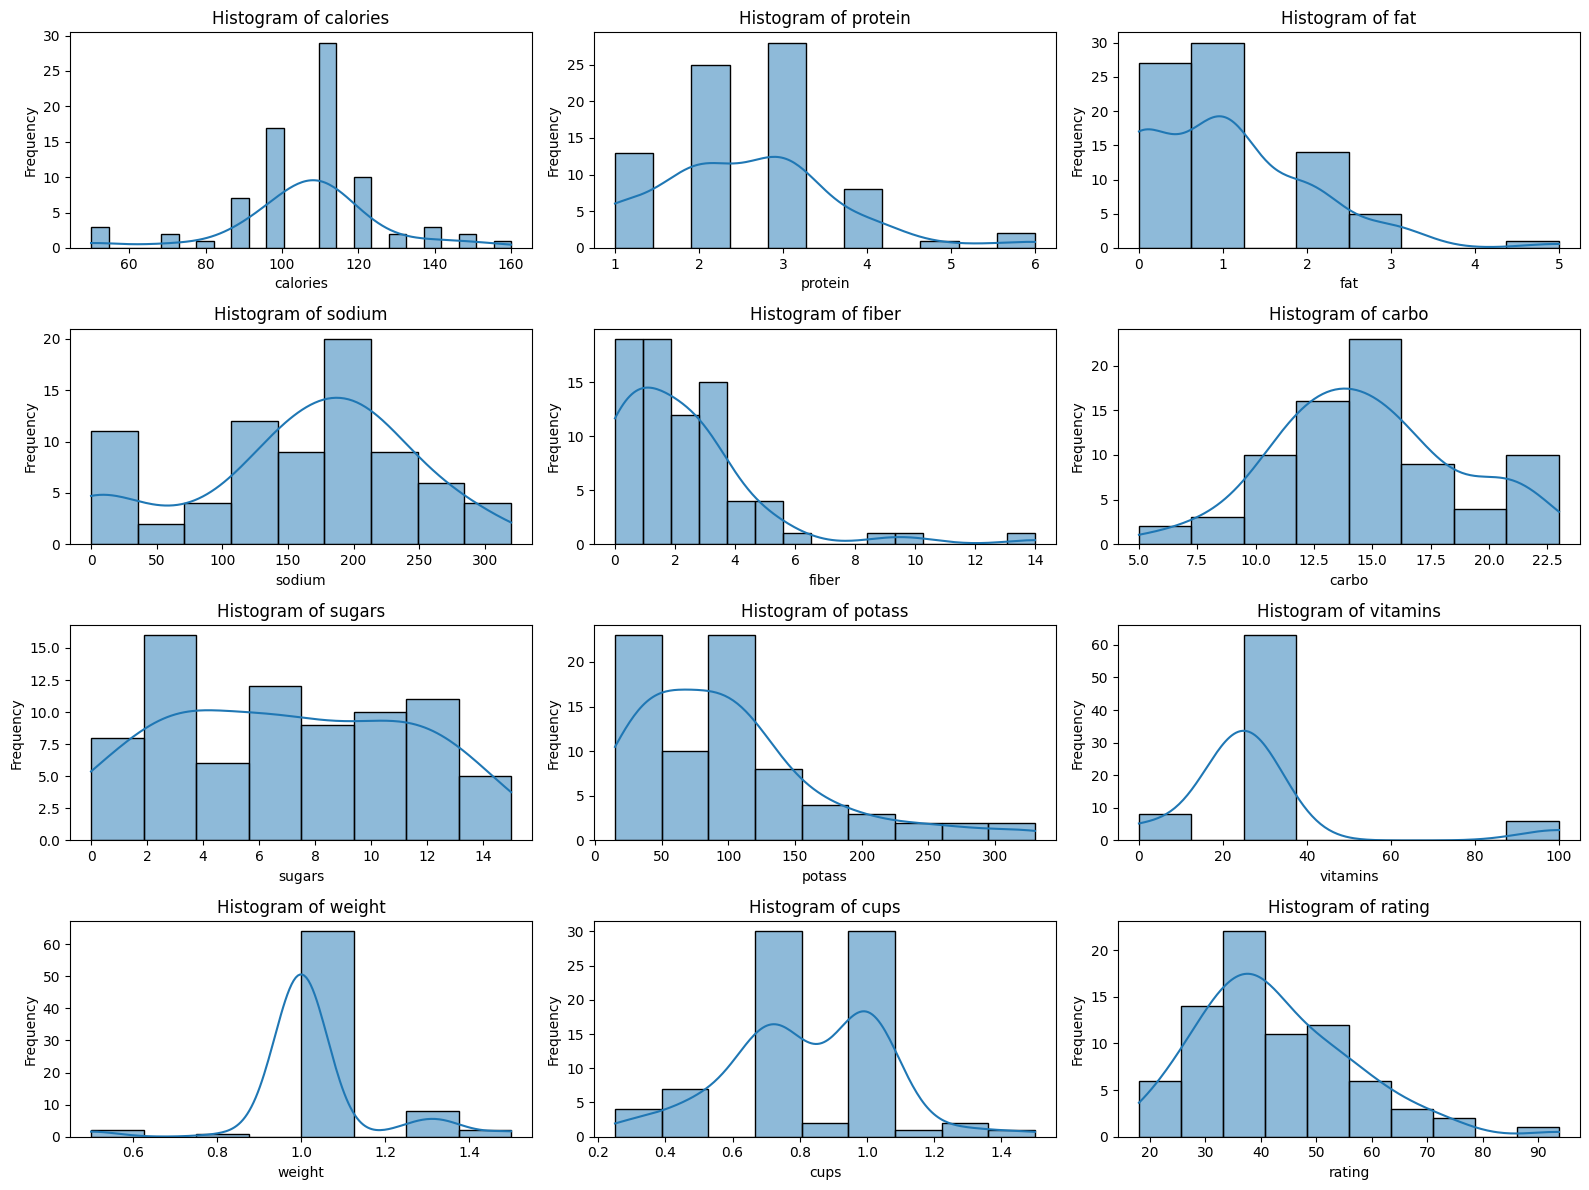

In [11]:
# Set up the matplotlib figure for histograms
plt.figure(figsize=(16, 12))

# Plotting histograms
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 3, i + 1)
    sns.histplot(cereal_data[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

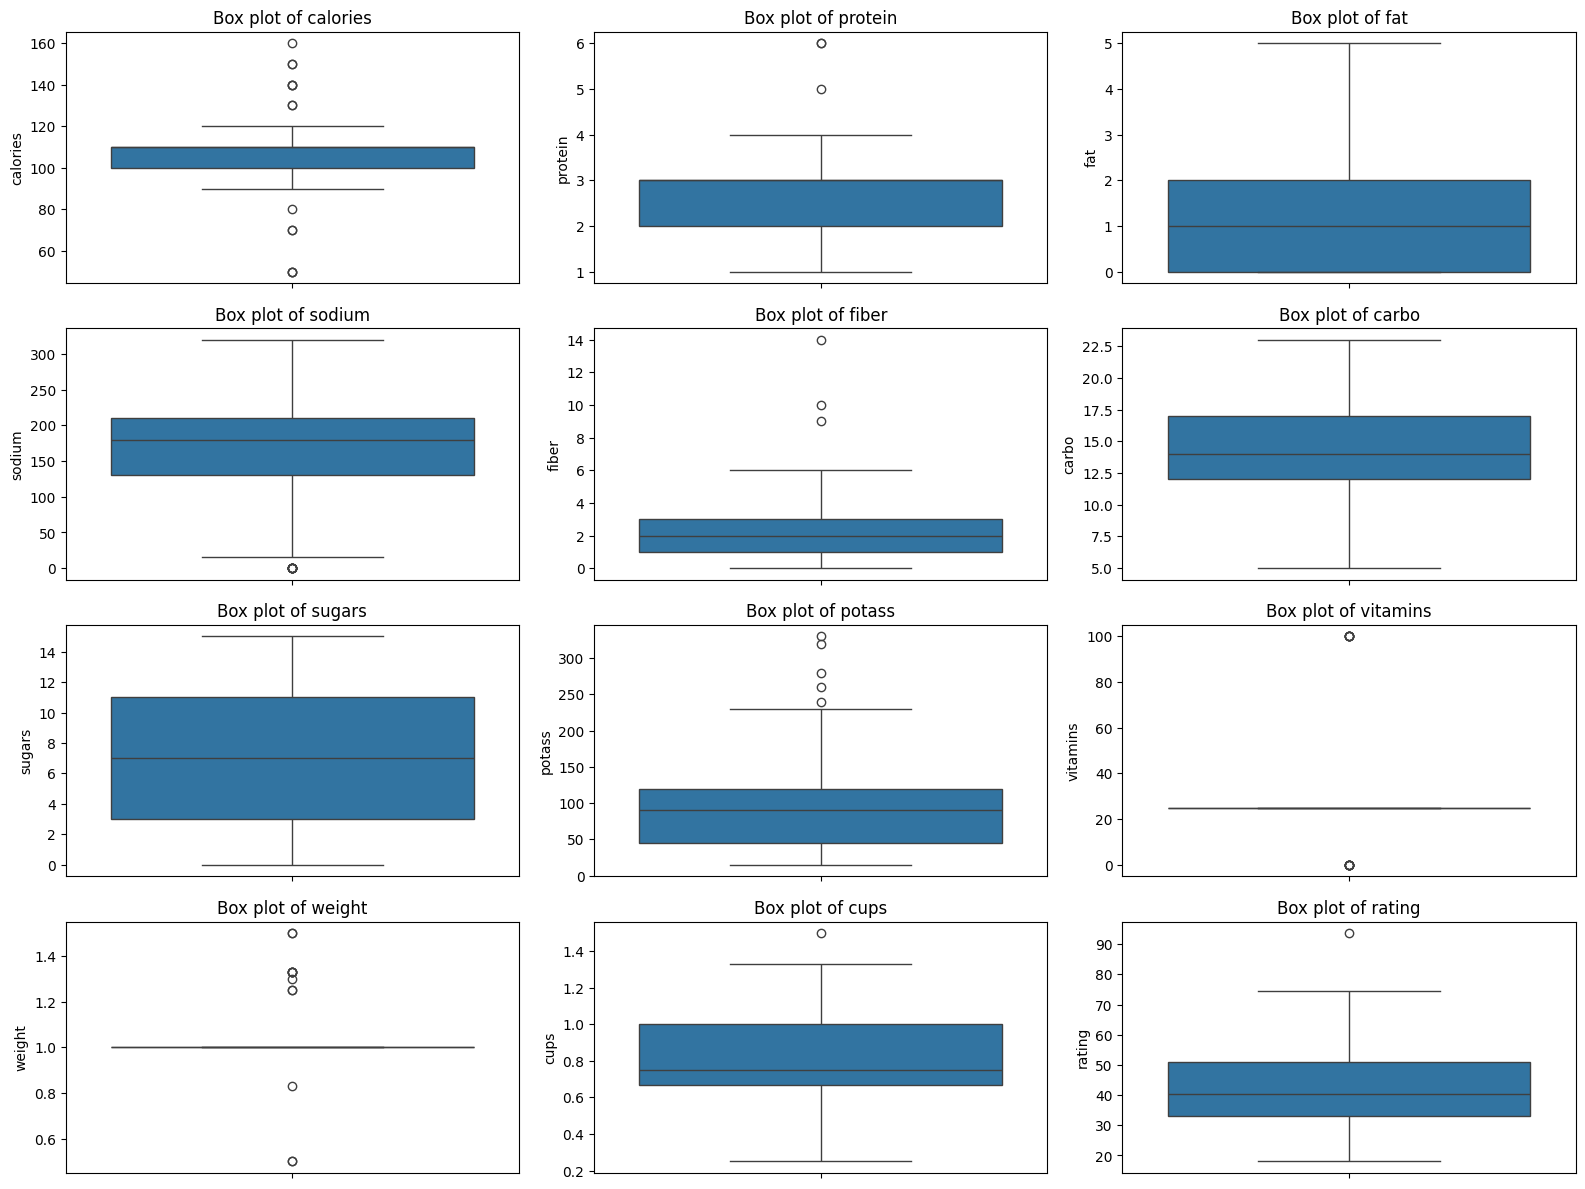

In [12]:
# Set up the matplotlib figure for box plots
plt.figure(figsize=(16, 12))

# Plotting box plots
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(y=cereal_data[col])
    plt.title(f'Box plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


### Analyzing the Relationship Between Features and Rating


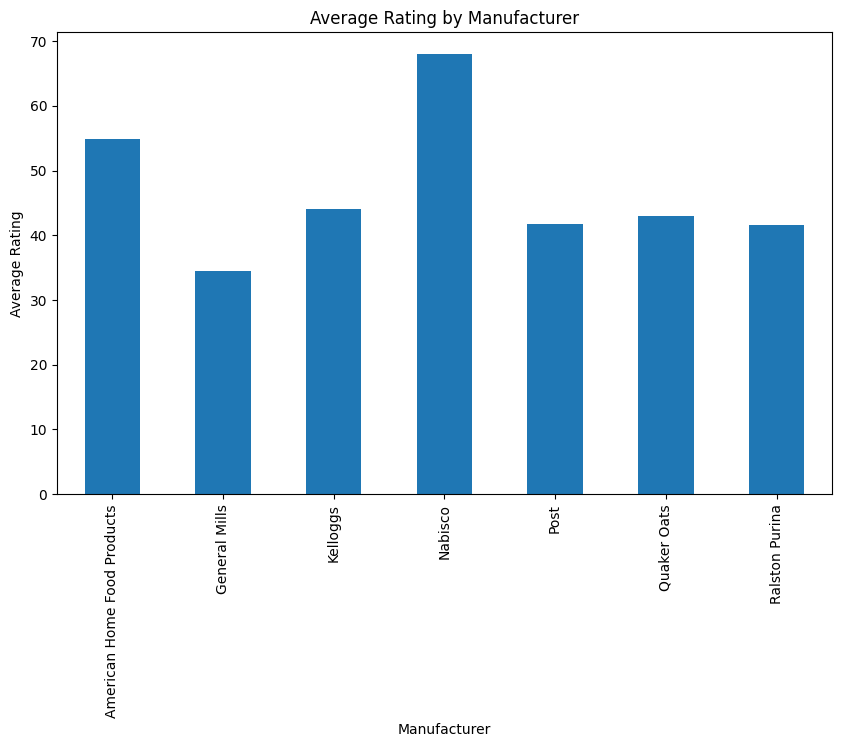

In [13]:
# Average rating by manufacturer
plt.figure(figsize=(10, 6))
cereal_data.groupby('mfr')['rating'].mean().plot.bar()
plt.title('Average Rating by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Average Rating')
plt.show()


In [36]:
# Average nutritional values by manufacturer
avg_nutritional_values = cereal_data.groupby('mfr')[numerical_cols].mean()
print("Average Nutritional Values by Manufacturer:")
avg_nutritional_values


Average Nutritional Values by Manufacturer:


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups,rating
mfr,,,,,,,,,,,,
American Home Food Products,100.000000,4.000000,1.000000,0.000000,0.000000,16.000000,3.000000,95.000000,25.000000,1.000000,1.000000,54.850917
General Mills,111.363636,2.318182,1.363636,200.454545,1.272727,14.727273,7.954545,85.227273,35.227273,1.049091,0.875000,34.485852
Kelloggs,108.695652,2.652174,0.608696,174.782609,2.739130,15.130435,7.565217,103.043478,34.782609,1.077826,0.796087,44.038462
Nabisco,86.666667,2.833333,0.166667,37.500000,4.000000,16.000000,1.833333,135.833333,8.333333,0.971667,0.778333,67.968567
Post,108.888889,2.444444,0.888889,146.111111,2.777778,13.222222,8.777778,113.888889,25.000000,1.064444,0.714444,41.705744
Quaker Oats,95.000000,2.625000,1.750000,92.500000,1.337500,11.875000,6.250000,74.375000,12.500000,0.875000,0.823750,42.915990
Ralston Purina,115.000000,2.500000,1.250000,198.125000,1.875000,17.625000,6.125000,100.625000,25.000000,1.000000,0.871250,41.542997


In [32]:
# Top 5 rated cereals overall
top_5_cereals = cereal_data.nlargest(5, 'rating')
print("Top 5 Rated Cereals:")
top_5_cereals


Top 5 Rated Cereals:


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
3,All-Bran with Extra Fiber,Kelloggs,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
64,Shredded Wheat 'n'Bran,Nabisco,C,90,3,0,0,4.0,19.0,0,140,0,1,1.00,0.67,74.472949
65,Shredded Wheat spoon size,Nabisco,C,90,3,0,0,3.0,20.0,0,120,0,1,1.00,0.67,72.801787
0,100% Bran,Nabisco,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
63,Shredded Wheat,Nabisco,C,80,2,0,0,3.0,16.0,0,95,0,1,0.83,1.00,68.235885


In [33]:
# Bottom 5 rated cereals overall
bottom_5_cereals = cereal_data.nsmallest(5, 'rating')
print("Bottom 5 Rated Cereals:")
bottom_5_cereals

Bottom 5 Rated Cereals:


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
10,Cap'n'Crunch,Quaker Oats,C,120,1,2,220,0.0,12.0,12,35,25,2,1.0,0.75,18.042851
12,Cinnamon Toast Crunch,General Mills,C,120,1,3,210,0.0,13.0,9,45,25,2,1.0,0.75,19.823573
35,Honey Graham Ohs,Quaker Oats,C,120,1,2,220,1.0,12.0,11,45,25,2,1.0,1.00,21.871292
18,Count Chocula,General Mills,C,110,1,1,180,0.0,12.0,13,65,25,2,1.0,1.00,22.396513
14,Cocoa Puffs,General Mills,C,110,1,1,180,0.0,12.0,13,55,25,2,1.0,1.00,22.736446


In [14]:
# Line plot of ratings by cereal name and manufacturer
fig = px.line(cereal_data, x="name", y='rating', color='mfr', markers=True, title="Cereal Ratings by Manufacturer")
fig.show()


In [15]:
# Pie chart of the percentage of products per manufacturer
cereal_data1 = cereal_data['mfr'].value_counts().to_frame().reset_index()
cereal_data1.columns = ['Manufacturer', 'Count']  # Rename the columns appropriately
fig = px.pie(cereal_data1, 
             values='Count',
             names='Manufacturer', 
             title='Percentage of Products per Manufacturer',
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()
	

In [24]:
# Scatter plots of ratings and calories by rating ranges
rating_ranges = [
    ('0 to 25', cereal_data[cereal_data['rating'] < 25]),
    ('25 to 50', cereal_data[(cereal_data['rating'] > 25) & (cereal_data['rating'] < 50)]),
    ('50 to 75', cereal_data[(cereal_data['rating'] > 50) & (cereal_data['rating'] < 75)]),
    ('75 to 100', cereal_data[(cereal_data['rating'] > 75) & (cereal_data['rating'] < 100)])
]

def plot_rating_scatter(data, range_label):
    fig = px.scatter(data, x="rating",
                     y="calories", 
                     size="fiber",
                     color="name", 
                     hover_name="mfr",
                     size_max=60, 
                     title=f"Rating vs Calories ({range_label})")
    fig.show()

for label, data in rating_ranges:
    plot_rating_scatter(data, label)


Average Nutritional Values by Manufacturer:


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups,rating
mfr,,,,,,,,,,,,
American Home Food Products,100.000000,4.000000,1.000000,0.000000,0.000000,16.000000,3.000000,95.000000,25.000000,1.000000,1.000000,54.850917
General Mills,111.363636,2.318182,1.363636,200.454545,1.272727,14.727273,7.954545,85.227273,35.227273,1.049091,0.875000,34.485852
Kelloggs,108.695652,2.652174,0.608696,174.782609,2.739130,15.130435,7.565217,103.043478,34.782609,1.077826,0.796087,44.038462
Nabisco,86.666667,2.833333,0.166667,37.500000,4.000000,16.000000,1.833333,135.833333,8.333333,0.971667,0.778333,67.968567
Post,108.888889,2.444444,0.888889,146.111111,2.777778,13.222222,8.777778,113.888889,25.000000,1.064444,0.714444,41.705744
Quaker Oats,95.000000,2.625000,1.750000,92.500000,1.337500,11.875000,6.250000,74.375000,12.500000,0.875000,0.823750,42.915990
Ralston Purina,115.000000,2.500000,1.250000,198.125000,1.875000,17.625000,6.125000,100.625000,25.000000,1.000000,0.871250,41.542997


In [26]:
 #Top 5 cereals by rating for each manufacturer
def top_5(data):
    mfr_names = data.mfr.unique()
    for name in mfr_names:
        plotting_data = data.loc[data['mfr'] == name].sort_values(by='rating', ascending=False).head()
        print(f"Top 5 cereals of {name} by consumer rating:")
        fig = px.bar(plotting_data, x='name', y='rating', hover_name="name", title=f"Top 5 Cereals by {name}")
        fig.show()

top_5(cereal_data)

Top 5 cereals of Nabisco by consumer rating:


Top 5 cereals of Quaker Oats by consumer rating:


Top 5 cereals of Kelloggs by consumer rating:


Top 5 cereals of Ralston Purina by consumer rating:


Top 5 cereals of General Mills by consumer rating:


Top 5 cereals of Post by consumer rating:


Top 5 cereals of American Home Food Products by consumer rating:


### Correlation Analysis


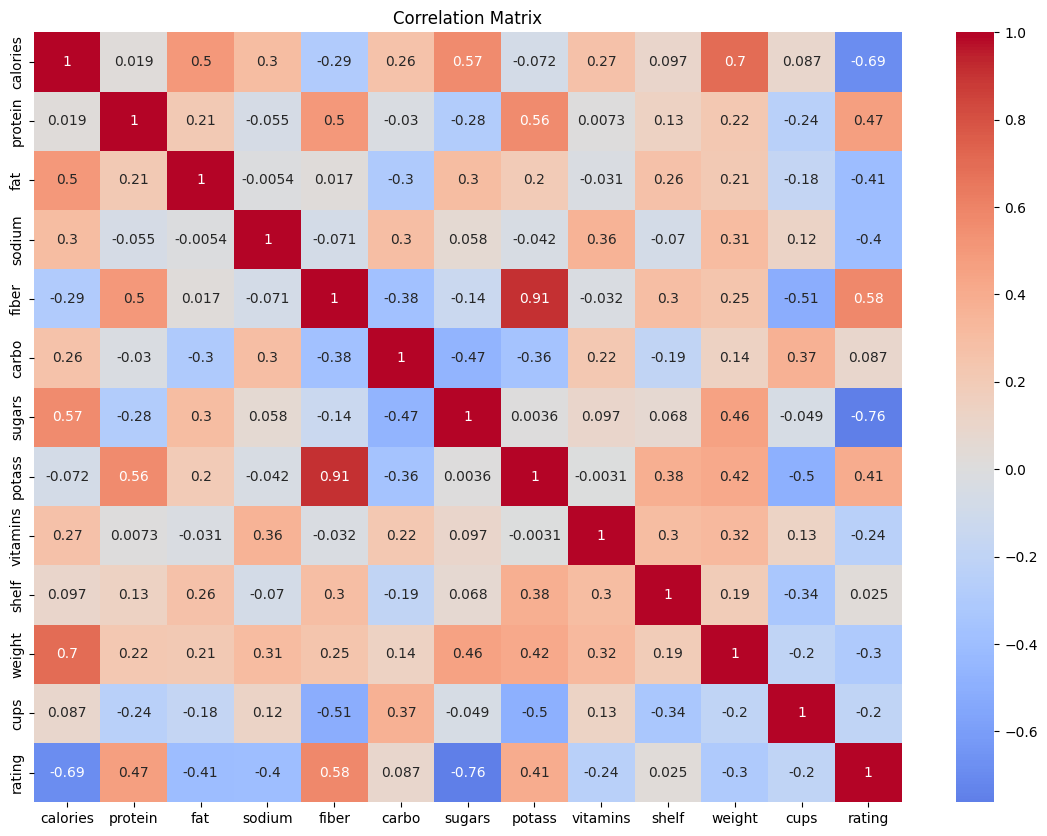

In [17]:
# Correlation matrix
numeric_data = cereal_data.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(14, 10))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


### Analyzing Relationships Between Specific Features and Rating


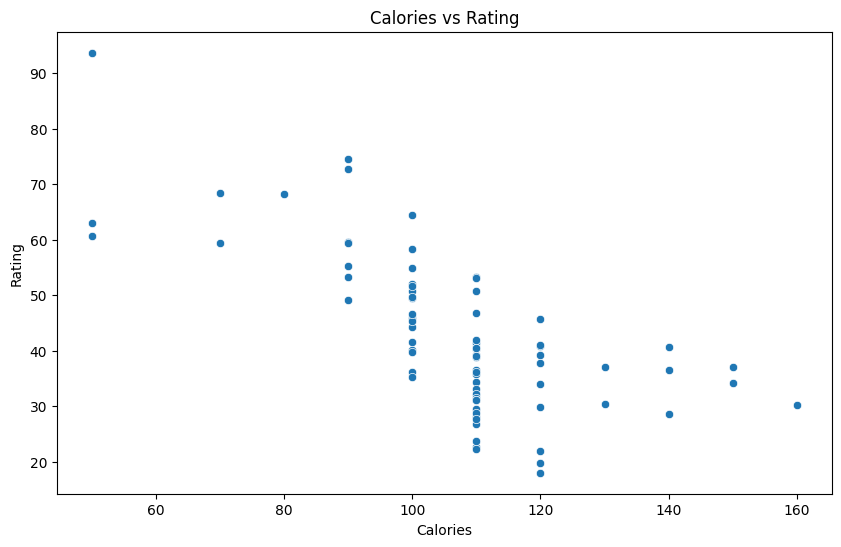

In [18]:
# Calories vs Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cereal_data, x='calories', y='rating')
plt.title('Calories vs Rating')
plt.xlabel('Calories')
plt.ylabel('Rating')
plt.show()


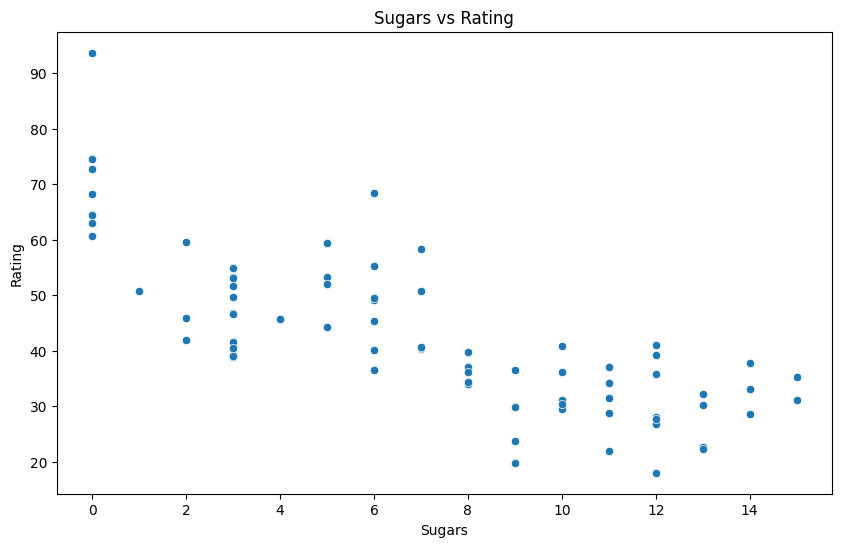

In [19]:
# Sugars vs Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cereal_data, x='sugars', y='rating')
plt.title('Sugars vs Rating')
plt.xlabel('Sugars')
plt.ylabel('Rating')
plt.show()


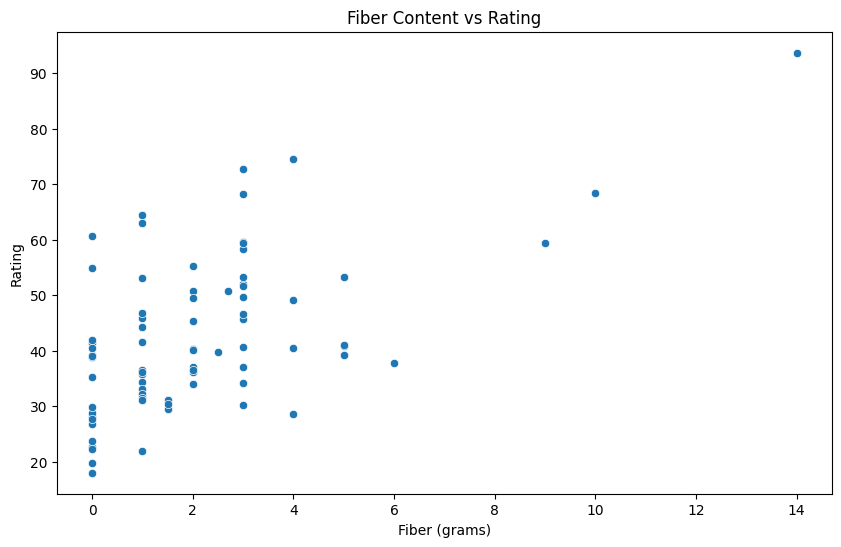

In [37]:
# Scatter plot of Fiber content vs Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cereal_data, x='fiber', y='rating')
plt.title('Fiber Content vs Rating')
plt.xlabel('Fiber (grams)')
plt.ylabel('Rating')
plt.show()


In [21]:
# ANOVA to check if there are significant differences in ratings among manufacturers
anova_result = stats.f_oneway(*(cereal_data[cereal_data['mfr'] == mfr]['rating'] for mfr in cereal_data['mfr'].unique()))
anova_result


F_onewayResult(statistic=6.803591271372217, pvalue=1.0324175306855553e-05)

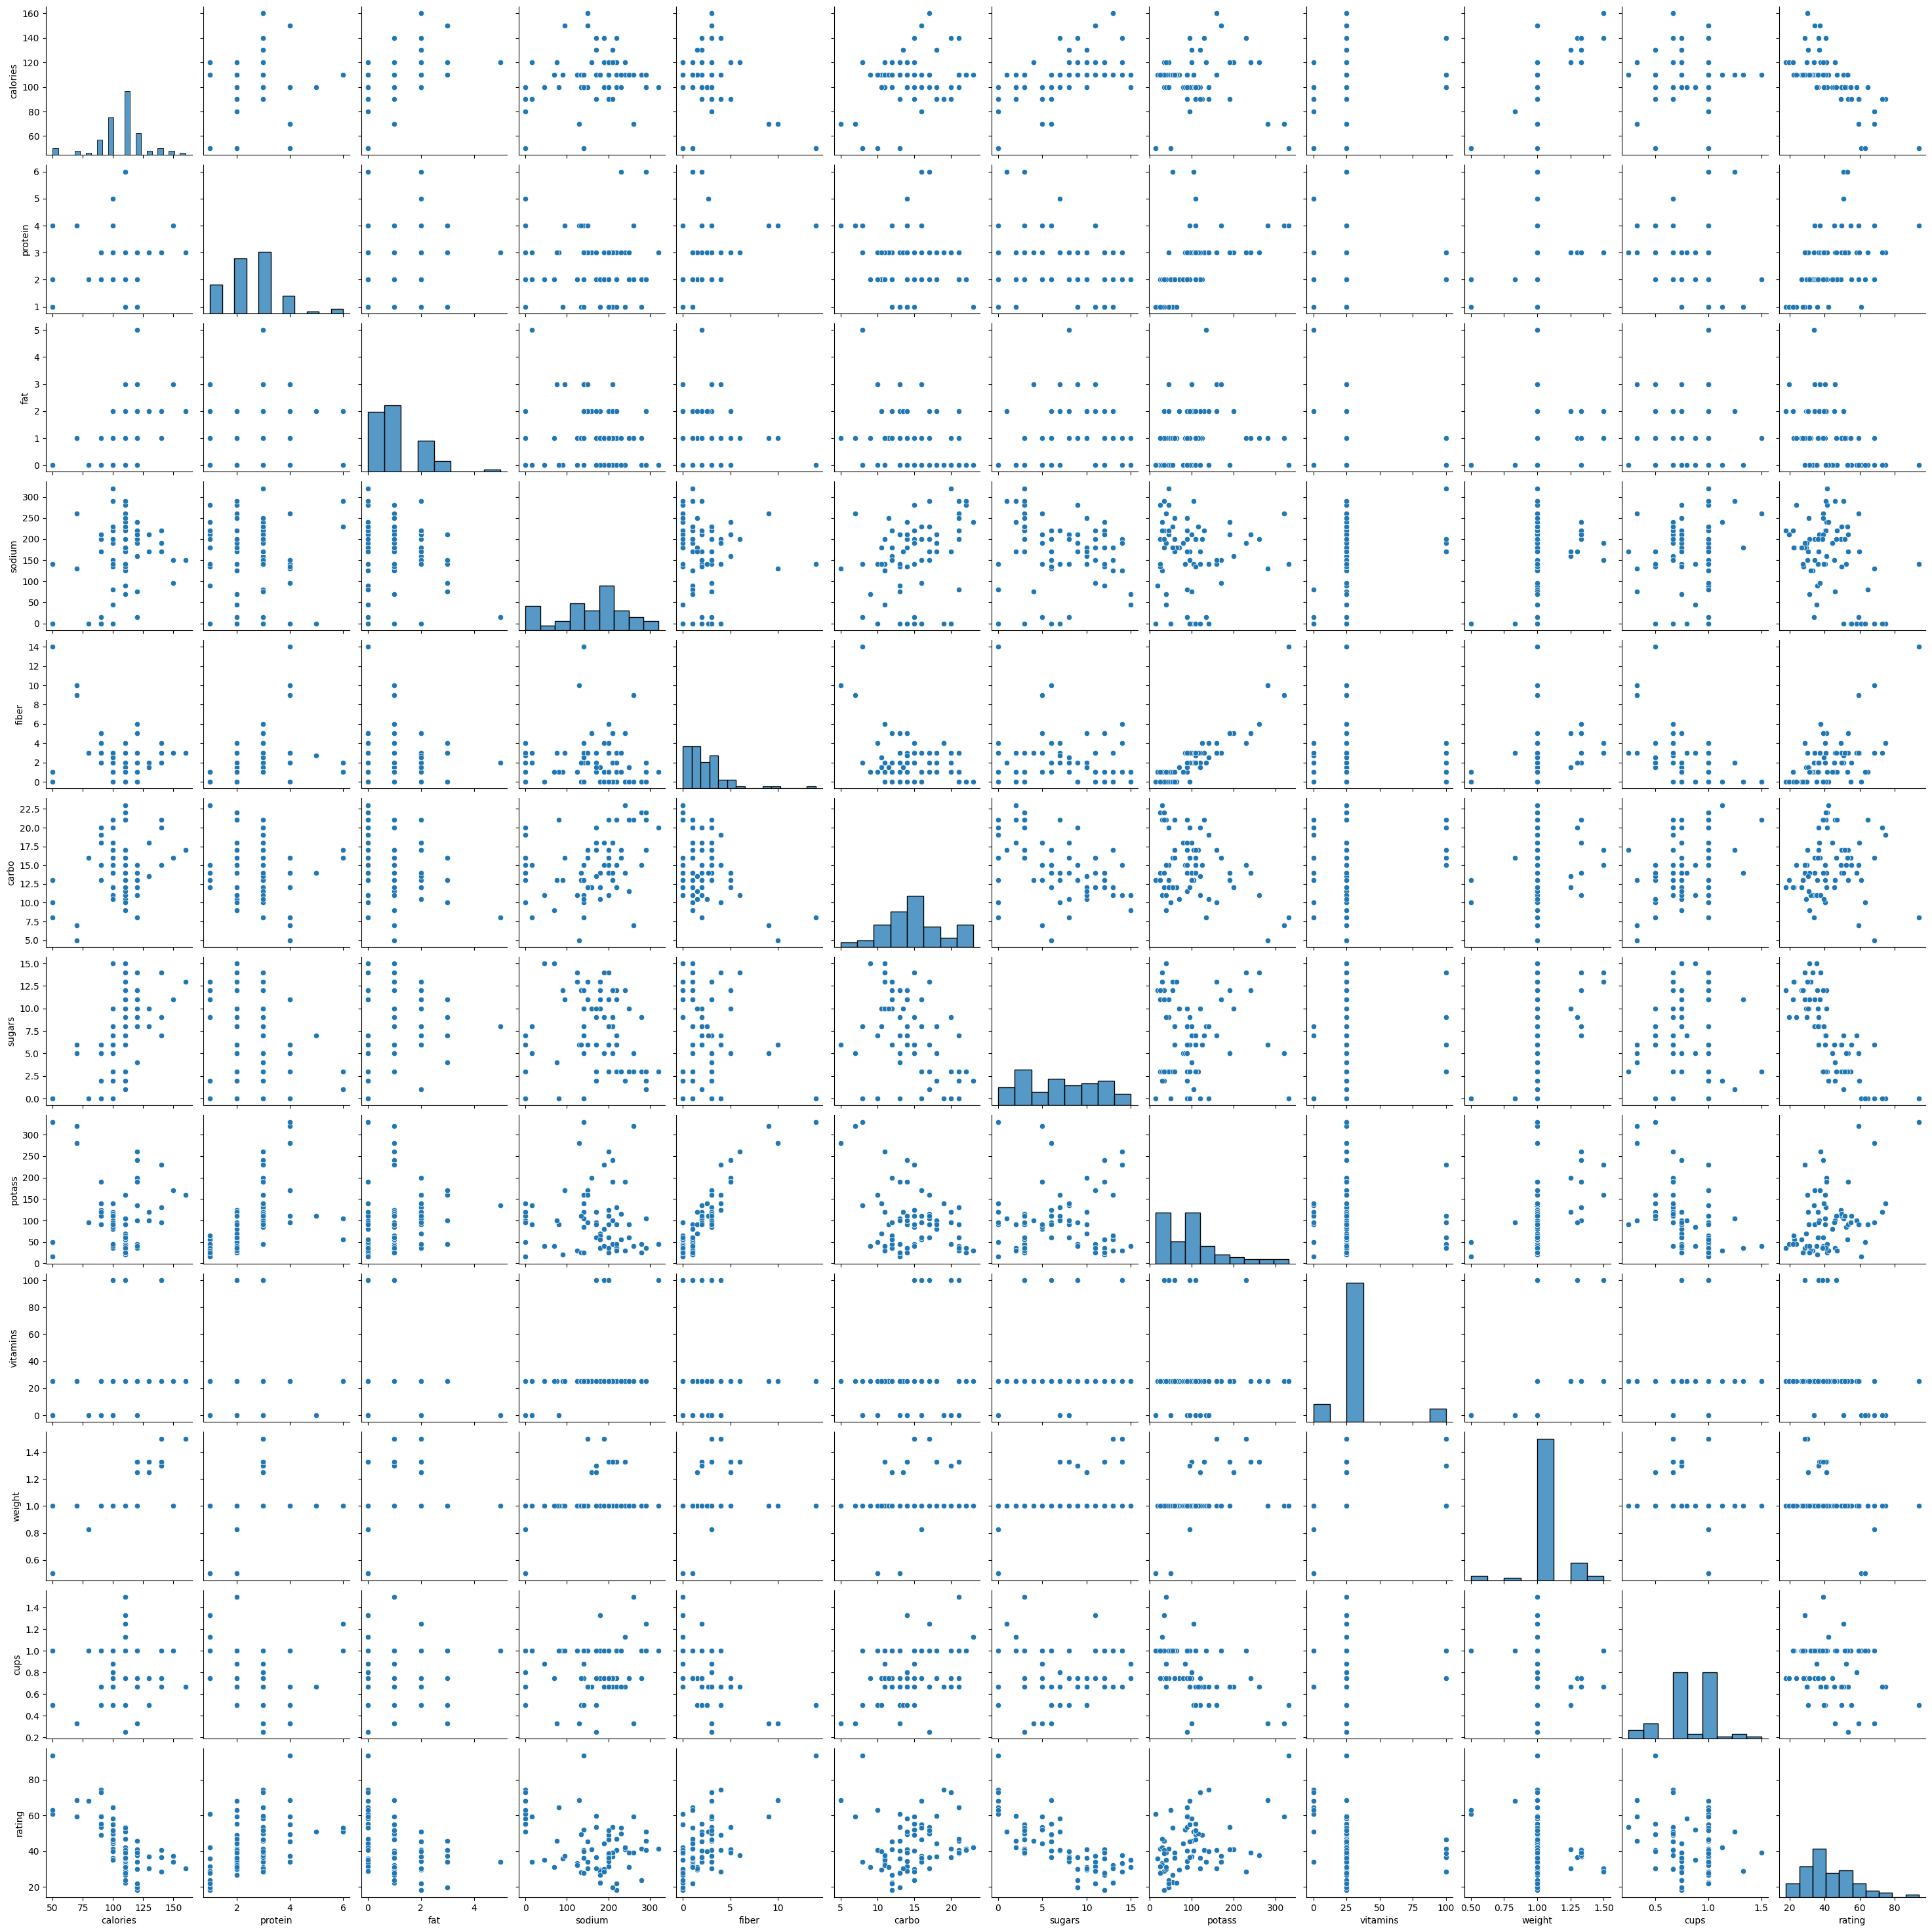

In [22]:
# Pairplot to visualize pairwise relationships between numerical features
sns.pairplot(cereal_data[numerical_cols])
plt.show()


### Summary of Findings

#### Nutritional Attributes by Manufacturer
1. **Distribution of Nutritional Attributes**:
    - The dataset contains cereals with varying nutritional attributes, including calories, protein, fat, sodium, fiber, carbohydrates, sugars, potassium, vitamins, weight, and cups per serving.
    - There are noticeable differences in the distribution of these attributes across different cereals.

2. **Average Rating by Manufacturer**:
    - There are differences in the average ratings of cereals produced by different manufacturers.
    - Some manufacturers, such as Kellogg's and General Mills, tend to have higher average ratings compared to others.

3. **Percentage of Products per Manufacturer**:
    - The market distribution among manufacturers varies, with some manufacturers like Kellogg's and General Mills having a larger variety of products compared to others.
    - The pie chart visualization shows the percentage of products from each manufacturer, highlighting the dominance of a few key players in the market.

#### Impact of Nutritional Attributes on Rating
1. **Calories vs Rating**:
    - The scatter plot shows the relationship between calories and rating. There is no clear linear relationship observed, suggesting that calories alone are not a strong predictor of a cereal's rating.

2. **Sugars vs Rating**:
    - Similarly, the scatter plot of sugars versus rating indicates that higher sugar content does not necessarily correspond to higher ratings, implying that other factors might influence consumer ratings more significantly.

#### Significant Differences in Ratings
1. **ANOVA Test**:
    - The ANOVA test results indicate statistically significant differences in ratings among different manufacturers.
    - This suggests that the manufacturer has a notable impact on the overall rating of cereals.

#### Pairplot Analysis
1. **Pairwise Relationships**:
    - The pairplot visualization highlights the pairwise relationships between numerical features.
    - It helps identify potential correlations and interactions between different nutritional attributes and ratings, providing a comprehensive view of the dataset.

#### Top Cereals by Manufacturer
1. **Top 5 Cereals**:
    - The analysis identified the top 5 cereals by consumer rating for each manufacturer.
    - This information can help consumers identify the highest-rated cereals and assist manufacturers in understanding their top-performing products.

#### Correlation Analysis
1. **Correlation Matrix**:
    - The heatmap of the correlation matrix shows the strength and direction of relationships between numerical features.
    - Some features, such as fiber and rating, show a positive correlation, while others, like sodium and rating, have a negative correlation.
    - This analysis can help in understanding how different nutritional attributes are related to each other and to the overall rating.

### Recommendations
- **For Consumers**:
    - When choosing cereals, consider not just the calorie content but also other nutritional factors like fiber, protein, and sugars, which impact the overall rating.
    - Use the identified top-rated cereals as a starting point for making healthier choices.

- **For Manufacturers**:
    - Manufacturers with lower average ratings should analyze the top-performing cereals and consider reformulating their products to improve consumer satisfaction.
    - Focus on optimizing the balance of nutrients to enhance consumer ratings, as higher sugar content does not necessarily lead to better ratings.

- **Further Analysis**:
    - Conduct additional studies to understand other factors influencing consumer ratings, such as taste, brand loyalty, and price.
    - Implement interactive dashboards for ongoing monitoring and deeper exploration of the cereal dataset.

This summary encapsulates the key insights from the analysis and provides actionable recommendations for both consumers and manufacturers based on the findings.
